<a href="https://colab.research.google.com/github/Catherine-Nguyen88/project_voting/blob/main/Voting_Rhiannon's_Part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Clone from repo
! git clone https://github.com/Catherine-Nguyen88/project_voting

Cloning into 'project_voting'...
remote: Enumerating objects: 248, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 248 (delta 85), reused 132 (delta 72), pack-reused 90
Receiving objects: 100% (248/248), 70.74 MiB | 6.84 MiB/s, done.
Resolving deltas: 100% (121/121), done.
Updating files: 100% (68/68), done.


In [2]:
#Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Taking Isabella's Code and Uploading it to my Voting Part to make summaries?

In [3]:
df = pd.read_csv('./project_voting/data/voting_VA.csv')
df

,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,11161,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,20220315,TOTAL
1,11162,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL
2,11163,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,RALPH NADER,GREEN,220,11925,20220315,TOTAL
3,11164,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,OTHER,OTHER,261,11925,20220315,TOTAL
4,11165,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,36846,20220315,TOTAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3731,71966,2020,VIRGINIA,VA,WINCHESTER CITY,51840,US PRESIDENT,OTHER,OTHER,24,12113,20220315,ELECTION DAY
3732,71967,2020,VIRGINIA,VA,WINCHESTER CITY,51840,US PRESIDENT,OTHER,OTHER,0,12113,20220315,PROVISIONAL
3733,71968,2020,VIRGINIA,VA,WINCHESTER CITY,51840,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,2825,12113,20220315,ABSENTEE
3734,71969,2020,VIRGINIA,VA,WINCHESTER CITY,51840,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,2370,12113,20220315,ELECTION DAY


In [4]:
#Testing demographic file
fname = './project_voting/data/county_data/0002_ds176_20105_county_E.csv'
dem = pd.read_csv(fname, encoding='latin-1')
dem.head()

,Unnamed: 0,X.2,X.1,X,GISJOIN,YEAR,STUSAB,REGIONA,DIVISIONA,STATE,...,JSDE003,JSDE004,JSDE005,JSDE006,JSDE007,JSDE008,JSDE009,JSDE010,JS5E001,JTIE001
0,1,1,1,1,GIS Join Match Code,Data File Year,State Postal Abbreviation,Region Code,Division Code,State Name,...,Built 2000 to 2004,Built 1990 to 1999,Built 1980 to 1989,Built 1970 to 1979,Built 1960 to 1969,Built 1950 to 1959,Built 1940 to 1949,Built 1939 or earlier,Median gross rent,Median value (dollars)
1,2,2,2,2,G0100010,2006-2010,AL,NaN,NaN,Alabama,...,2946,5142,3582,3542,2626,931,235,641,769,133900
2,3,3,3,3,G0100030,2006-2010,AL,NaN,NaN,Alabama,...,22743,28796,16210,11233,5768,3516,1678,2541,821,177200
3,4,4,4,4,G0100050,2006-2010,AL,NaN,NaN,Alabama,...,493,2669,2412,2095,1496,966,573,1055,512,88200
4,5,5,5,5,G0100070,2006-2010,AL,NaN,NaN,Alabama,...,381,2202,1452,1591,1226,673,263,890,541,81200


In [5]:
#Drop first row
dem = dem.drop([0])
dem.head()

#Extracting Virginia data
dem_VA = dem[dem['STATE'] == 'Virginia']
print(dem_VA.shape) # the shape is correct for VA
dem_VA.head()

(0, 276)


,Unnamed: 0,X.2,X.1,X,GISJOIN,YEAR,STUSAB,REGIONA,DIVISIONA,STATE,...,JSDE003,JSDE004,JSDE005,JSDE006,JSDE007,JSDE008,JSDE009,JSDE010,JS5E001,JTIE001


In [6]:
# modify the voting csv dataset to match the county names present in the demographics data
# change to title case and if the county doesnt end in "City", add "County"

def match_county_name(county_name):
  if county_name.endswith('CITY'):
    return county_name.title()
  else:
    return county_name.title() + ' County'

voting_df = df.copy()
voting_df['county_name'] = voting_df['county_name'].apply(lambda x: match_county_name(x))

voting_df.head()

# now, for each county, get candidatevotes/totalvotes
voting_df['fractionalvotes'] = voting_df['candidatevotes']/voting_df['totalvotes']
voting_df.head()

# create merged dataframe
dem_VA = dem_VA.rename(columns={'COUNTY':'county_name'})
dem_VA.head()

,Unnamed: 0,X.2,X.1,X,GISJOIN,YEAR,STUSAB,REGIONA,DIVISIONA,STATE,...,JSDE003,JSDE004,JSDE005,JSDE006,JSDE007,JSDE008,JSDE009,JSDE010,JS5E001,JTIE001


In [7]:
# merge the datasets
merged_df = voting_df.merge(dem_VA, on='county_name', how='left')
merged_df.head()

,Unnamed: 0_x,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,...,JSDE003,JSDE004,JSDE005,JSDE006,JSDE007,JSDE008,JSDE009,JSDE010,JS5E001,JTIE001
0,11161,2000,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11162,2000,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11163,2000,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,RALPH NADER,GREEN,220,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11164,2000,VIRGINIA,VA,Accomack County,51001,US PRESIDENT,OTHER,OTHER,261,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11165,2000,VIRGINIA,VA,Albemarle County,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Final Merging
voting_original = pd.read_csv('./project_voting/data/voting_VA.csv')
voting_original.head(5)

# modify voting CSV
def match_county_name(county_name):
  if county_name.endswith('CITY'):
    return county_name.title()
  else:
    return county_name.title() + ' County'

voting_df = voting_original.copy()
voting_df['county_name'] = voting_df['county_name'].apply(lambda x: match_county_name(x))
voting_df.head()

# now, for each county, get candidatevotes/totalvotes
voting_df['fractionalvotes'] = voting_df['candidatevotes']/voting_df['totalvotes']

# split voting data into separate years for merging
voting_2000 = voting_df[voting_df['year']==2000]
voting_2004 = voting_df[voting_df['year']==2004]
voting_2008 = voting_df[voting_df['year']==2008]
voting_2012 = voting_df[voting_df['year']==2012]
voting_2016 = voting_df[voting_df['year']==2016]
voting_2020 = voting_df[voting_df['year']==2020]

## 2000 Election

In [9]:
# 2000 election
# extract demographic data
fname = './project_voting/data/county_data/0002_ds176_20105_county_E.csv'
dem = pd.read_csv(fname, encoding='latin-1')
# need to drop the 1st row
dem = dem.drop([0])
dem_VA = dem[dem['STATE'] == 'Virginia']
print(dem_VA.shape) # the shape is correct for VA
# rename for merging
dem_VA = dem_VA.rename(columns={'COUNTY':'county_name'})

# merge the datasets
merged_2000 = voting_2000.merge(dem_VA, on='county_name', how='left')
merged_2000.head(5)

merged_2000['JSDE003']


#na_counts = merged_2000.isna().sum()
#print(na_counts)

(0, 276)


0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
531    NaN
532    NaN
533    NaN
534    NaN
535    NaN
Name: JSDE003, Length: 536, dtype: object

In [10]:
#Votes by county/party
county_party_votes = merged_2000.groupby(['county_name', 'party'])['fractionalvotes'].sum().reset_index()

#Votes for Each County
county_total_votes = county_party_votes.groupby('county_name')['fractionalvotes'].sum().reset_index()

#Merge total votes with county_party_votes to calculate party share
county_party_share = county_party_votes.merge(county_total_votes, on='county_name')
county_party_share['party_share'] = county_party_share['fractionalvotes_x'] / county_party_share['fractionalvotes_y']

#Parties as Columns
party_share_table00 = county_party_share.pivot(index='county_name', columns='party', values='party_share').fillna(0)

# Display the summary table
print(party_share_table00)

party                DEMOCRAT     GREEN     OTHER  REPUBLICAN
county_name                                                  
Accomack County      0.427002  0.018449  0.021887    0.532662
Albemarle County     0.441161  0.055447  0.006975    0.496418
Alexandria County    0.609305  0.037935  0.007772    0.344988
Alleghany County     0.432169  0.012102  0.007613    0.548116
Amelia County        0.366332  0.008354  0.009816    0.615497
...                       ...       ...       ...         ...
Williamsburg County  0.462819  0.050470  0.009664    0.477047
Winchester County    0.420746  0.026503  0.005706    0.547045
Wise County          0.481743  0.012021  0.017581    0.488655
Wythe County         0.338582  0.012910  0.008998    0.639511
York County          0.350730  0.019526  0.006875    0.622869

[129 rows x 4 columns]


In [11]:
highest_dem = party_share_table00['DEMOCRAT'].idxmax()
highest_dem_share = party_share_table00.loc[highest_dem, 'DEMOCRAT']

# Find the county with the highest Republican vote share
highest_rep = party_share_table00['REPUBLICAN'].idxmax()
highest_rep_share = party_share_table00.loc[highest_rep, 'REPUBLICAN']

print(f"County with the highest Democratic vote share: {highest_dem} ({highest_dem_share:.2f}%)")
print(f"County with the highest Republican vote share: {highest_rep} ({highest_rep_share:.2f}%)")

County with the highest Democratic vote share: Petersburg County (0.79%)
County with the highest Republican vote share: Poquoson County (0.73%)


## 2004 Election

In [12]:
#2004 Election
# extract demographic data
fname = './project_voting/data/county_data/0002_ds176_20105_county_E.csv'
dem = pd.read_csv(fname, encoding='latin-1')
# need to drop the 1st row
dem = dem.drop([0])
dem_VA = dem[dem['STATE'] == 'Virginia']
print(dem_VA.shape) # the shape is correct for VA
# rename for merging
dem_VA = dem_VA.rename(columns={'COUNTY':'county_name'})

# merge the datasets
merged_2004 = voting_2004.merge(dem_VA, on='county_name', how='left')
merged_2004.head(5)

na_counts = merged_2004.isna().sum()
print(na_counts)

(0, 276)
Unnamed: 0_x      0
year              0
state             0
state_po          0
county_name       0
               ... 
JSDE008         402
JSDE009         402
JSDE010         402
JS5E001         402
JTIE001         402
Length: 289, dtype: int64


In [13]:
#Votes by county/party
county_party_votes = merged_2004.groupby(['county_name', 'party'])['fractionalvotes'].sum().reset_index()

#Votes for Each County
county_total_votes = county_party_votes.groupby('county_name')['fractionalvotes'].sum().reset_index()

#Merge total votes with county_party_votes to calculate party share
county_party_share = county_party_votes.merge(county_total_votes, on='county_name')
county_party_share['party_share'] = county_party_share['fractionalvotes_x'] / county_party_share['fractionalvotes_y']

#Parties as Columns
party_share_table04 = county_party_share.pivot(index='county_name', columns='party', values='party_share').fillna(0)

# Display the summary table
print(party_share_table04)

party                DEMOCRAT     OTHER  REPUBLICAN
county_name                                        
Accomack County      0.413148  0.008386    0.578467
Albemarle County     0.505146  0.010268    0.484586
Alexandria County    0.668390  0.009022    0.322588
Alleghany County     0.445170  0.004170    0.550660
Amelia County        0.345006  0.006670    0.648323
...                       ...       ...         ...
Williamsburg County  0.512963  0.009259    0.477778
Winchester County    0.424596  0.009954    0.565450
Wise County          0.405394  0.012577    0.582029
Wythe County         0.309936  0.005366    0.684698
York County          0.343909  0.006961    0.649130

[129 rows x 3 columns]


In [14]:
highest_dem = party_share_table04['DEMOCRAT'].idxmax()
highest_dem_share = party_share_table04.loc[highest_dem, 'DEMOCRAT']

# Find the county with the highest Republican vote share
highest_rep = party_share_table04['REPUBLICAN'].idxmax()
highest_rep_share = party_share_table04.loc[highest_rep, 'REPUBLICAN']

print(f"County with the highest Democratic vote share: {highest_dem} ({highest_dem_share:.2f}%)")
print(f"County with the highest Republican vote share: {highest_rep} ({highest_rep_share:.2f}%)")

County with the highest Democratic vote share: Petersburg County (0.81%)
County with the highest Republican vote share: Poquoson County (0.77%)


## 2008 Election

In [15]:
#2008 Election
# extract demographic data
fname = './project_voting/data/county_data/0002_ds191_20125_county_E.csv'
dem = pd.read_csv(fname, encoding='latin-1')
# need to drop the 1st row
dem = dem.drop([0])
dem_VA = dem[dem['STATE'] == 'Virginia']
print(dem_VA.shape) # the shape is correct for VA
# rename for merging
dem_VA = dem_VA.rename(columns={'COUNTY':'county_name'})

# merge the datasets
merged_2008 = voting_2008.merge(dem_VA, on='county_name', how='left')
merged_2008.head(5)

na_counts = merged_2008.isna().sum()
print(na_counts)

(134, 191)
Unnamed: 0_x      0
year              0
state             0
state_po          0
county_name       0
               ... 
QX8E001         114
QX8E002         114
QX8E003         114
QZTE001         114
QZ6E001         114
Length: 204, dtype: int64


In [16]:
#Votes by county/party
county_party_votes = merged_2008.groupby(['county_name', 'party'])['fractionalvotes'].sum().reset_index()

#Votes for Each County
county_total_votes = county_party_votes.groupby('county_name')['fractionalvotes'].sum().reset_index()

#Merge total votes with county_party_votes to calculate party share
county_party_share = county_party_votes.merge(county_total_votes, on='county_name')
county_party_share['party_share'] = county_party_share['fractionalvotes_x'] / county_party_share['fractionalvotes_y']

#Parties as Columns
party_share_table08 = county_party_share.pivot(index='county_name', columns='party', values='party_share').fillna(0)

# Display the summary table
print(party_share_table08)

party                DEMOCRAT     OTHER  REPUBLICAN
county_name                                        
Accomack County      0.486910  0.011713    0.501376
Albemarle County     0.584340  0.012082    0.403578
Alexandria County    0.717313  0.010090    0.272597
Alleghany County     0.482155  0.013706    0.504139
Amelia County        0.381069  0.010875    0.608056
...                       ...       ...         ...
Williamsburg County  0.637690  0.015618    0.346692
Winchester County    0.520245  0.013135    0.466621
Wise County          0.353303  0.016197    0.630499
Wythe County         0.328797  0.014170    0.657033
York County          0.404166  0.010738    0.585096

[129 rows x 3 columns]


In [17]:
highest_dem = party_share_table08['DEMOCRAT'].idxmax()
highest_dem_share = party_share_table08.loc[highest_dem, 'DEMOCRAT']

# Find the county with the highest Republican vote share
highest_rep = party_share_table08['REPUBLICAN'].idxmax()
highest_rep_share = party_share_table08.loc[highest_rep, 'REPUBLICAN']

print(f"County with the highest Democratic vote share: {highest_dem} ({highest_dem_share:.2f}%)")
print(f"County with the highest Republican vote share: {highest_rep} ({highest_rep_share:.2f}%)")

County with the highest Democratic vote share: Petersburg County (0.89%)
County with the highest Republican vote share: Poquoson County (0.74%)


## 2012 Election

In [18]:
#2012 Election
# extract demographic data
fname = './project_voting/data/county_data/0002_ds206_20145_county_E.csv'
dem = pd.read_csv(fname, encoding='latin-1')
# need to drop the 1st row
dem = dem.drop([0])
dem_VA = dem[dem['STATE'] == 'Virginia']
print(dem_VA.shape) # the shape is correct for VA
# rename for merging
dem_VA = dem_VA.rename(columns={'COUNTY':'county_name'})

# merge the datasets
merged_2012 = voting_2012.merge(dem_VA, on='county_name', how='left')
merged_2012.head(5)

na_counts = merged_2012.isna().sum()
print(na_counts)

(133, 192)
Unnamed: 0_x      0
year              0
state             0
state_po          0
county_name       0
               ... 
ABGXE002        114
ABGXE003        114
ABIHE001        114
ABIOE001        114
ABITE001        114
Length: 205, dtype: int64


In [19]:
#Votes by county/party
county_party_votes = merged_2012.groupby(['county_name', 'party'])['fractionalvotes'].sum().reset_index()

#Votes for Each County
county_total_votes = county_party_votes.groupby('county_name')['fractionalvotes'].sum().reset_index()

#Merge total votes with county_party_votes to calculate party share
county_party_share = county_party_votes.merge(county_total_votes, on='county_name')
county_party_share['party_share'] = county_party_share['fractionalvotes_x'] / county_party_share['fractionalvotes_y']

#Parties as Columns
party_share_table12 = county_party_share.pivot(index='county_name', columns='party', values='party_share').fillna(0)

# Display the summary table
print(party_share_table12)

party                DEMOCRAT     OTHER  REPUBLICAN
county_name                                        
Accomack County      0.476917  0.011401    0.511682
Albemarle County     0.552006  0.015824    0.432170
Alexandria County    0.711051  0.013118    0.275831
Alleghany County     0.474418  0.024397    0.501185
Amelia County        0.360087  0.013594    0.626320
...                       ...       ...         ...
Williamsburg County  0.632808  0.021038    0.346154
Winchester County    0.494755  0.024864    0.480381
Wise County          0.250366  0.012119    0.737515
Wythe County         0.306117  0.020311    0.673572
York County          0.388272  0.016670    0.595058

[129 rows x 3 columns]


In [20]:
highest_dem = party_share_table12['DEMOCRAT'].idxmax()
highest_dem_share = party_share_table12.loc[highest_dem, 'DEMOCRAT']

# Find the county with the highest Republican vote share
highest_rep = party_share_table12['REPUBLICAN'].idxmax()
highest_rep_share = party_share_table12.loc[highest_rep, 'REPUBLICAN']

print(f"County with the highest Democratic vote share: {highest_dem} ({highest_dem_share:.2f}%)")
print(f"County with the highest Republican vote share: {highest_rep} ({highest_rep_share:.2f}%)")

County with the highest Democratic vote share: Petersburg County (0.90%)
County with the highest Republican vote share: Tazewell County (0.78%)


## 2016 Election

In [21]:
#2016 Election
# extract demographic data
fname = './project_voting/data/county_data/0002_ds225_20165_county_E.csv'
dem = pd.read_csv(fname, encoding='latin-1')
# need to drop the 1st row
dem = dem.drop([0])
dem_VA = dem[dem['STATE'] == 'Virginia']
print(dem_VA.shape) # the shape is correct for VA
# rename for merging
dem_VA = dem_VA.rename(columns={'COUNTY':'county_name'})

# merge the datasets
merged_2016 = voting_2016.merge(dem_VA, on='county_name', how='left')
merged_2016.head(5)

na_counts = merged_2016.isna().sum()
print(na_counts)

(133, 187)
Unnamed: 0_x      0
year              0
state             0
state_po          0
county_name       0
               ... 
AF7PE001        114
AF7PE002        114
AF7PE003        114
AF89E001        114
AF9LE001        114
Length: 200, dtype: int64


In [22]:
#Votes by county/party
county_party_votes = merged_2016.groupby(['county_name', 'party'])['fractionalvotes'].sum().reset_index()

#Votes for Each County
county_total_votes = county_party_votes.groupby('county_name')['fractionalvotes'].sum().reset_index()

#Merge total votes with county_party_votes to calculate party share
county_party_share = county_party_votes.merge(county_total_votes, on='county_name')
county_party_share['party_share'] = county_party_share['fractionalvotes_x'] / county_party_share['fractionalvotes_y']

#Parties as Columns
party_share_table16 = county_party_share.pivot(index='county_name', columns='party', values='party_share').fillna(0)

# Display the summary table
print(party_share_table16)

party                DEMOCRAT     OTHER  REPUBLICAN
county_name                                        
Accomack County      0.426097  0.031293    0.542610
Albemarle County     0.587826  0.072665    0.339509
Alexandria County    0.755471  0.069196    0.175333
Alleghany County     0.295700  0.038908    0.665392
Amelia County        0.302273  0.028977    0.668750
...                       ...       ...         ...
Williamsburg County  0.682665  0.064910    0.252426
Winchester County    0.484110  0.066842    0.449048
Wise County          0.178131  0.024797    0.797072
Wythe County         0.207599  0.039496    0.752904
York County          0.381001  0.066886    0.552113

[129 rows x 3 columns]


In [23]:
highest_dem = party_share_table16['DEMOCRAT'].idxmax()
highest_dem_share = party_share_table16.loc[highest_dem, 'DEMOCRAT']

# Find the county with the highest Republican vote share
highest_rep = party_share_table16['REPUBLICAN'].idxmax()
highest_rep_share = party_share_table16.loc[highest_rep, 'REPUBLICAN']

print(f"County with the highest Democratic vote share: {highest_dem} ({highest_dem_share:.2f}%)")
print(f"County with the highest Republican vote share: {highest_rep} ({highest_rep_share:.2f}%)")

County with the highest Democratic vote share: Petersburg County (0.87%)
County with the highest Republican vote share: Bland County (0.82%)


## 2020 Election

In [24]:
#2020 Election
# extract demographic data
fname = './project_voting/data/county_data/0002_ds249_20205_county_E.csv'
dem = pd.read_csv(fname, encoding='latin-1')
# need to drop the 1st row
dem = dem.drop([0])
dem_VA = dem[dem['STATE'] == 'Virginia']
print(dem_VA.shape) # the shape is correct for VA
# rename for merging
dem_VA = dem_VA.rename(columns={'COUNTY':'county_name'})

# merge the datasets
merged_2020 = voting_2020.merge(dem_VA, on='county_name', how='left')
merged_2020.head(5)

na_counts = merged_2020.isna().sum()
print(na_counts)

<ipython-input-24-c28d2184fcbc>:4: DtypeWarning: Columns (4,5,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,26

(133, 993)
Unnamed: 0_x      0
year              0
state             0
state_po          0
county_name       0
               ... 
AMWSE009        500
AMWSE010        500
AMWSE011        500
AMWSE012        500
AMWSE013        500
Length: 1006, dtype: int64


In [25]:
#Votes by county/party
county_party_votes = merged_2020.groupby(['county_name', 'party'])['fractionalvotes'].sum().reset_index()

#Votes for Each County
county_total_votes = county_party_votes.groupby('county_name')['fractionalvotes'].sum().reset_index()

#Merge total votes with county_party_votes to calculate party share
county_party_share = county_party_votes.merge(county_total_votes, on='county_name')
county_party_share['party_share'] = county_party_share['fractionalvotes_x'] / county_party_share['fractionalvotes_y']

#Parties as Columns
party_share_table20 = county_party_share.pivot(index='county_name', columns='party', values='party_share').fillna(0)

# Display the summary table
print(party_share_table20)

party              DEMOCRAT  LIBERTARIAN     OTHER  REPUBLICAN
county_name                                                   
Accomack County    0.446763     0.011084  0.001415    0.540738
Albemarle County   0.656789     0.015683  0.005769    0.321759
Alexandria City    0.802705     0.012385  0.008664    0.176246
Alleghany County   0.273437     0.010850  0.001463    0.714251
Amelia County      0.305422     0.010134  0.001647    0.682797
...                     ...          ...       ...         ...
Williamsburg City  0.695210     0.013353  0.006531    0.284906
Winchester City    0.545695     0.017584  0.005696    0.431025
Wise County        0.187180     0.006500  0.001866    0.804454
Wythe County       0.208519     0.011278  0.001791    0.778412
York County        0.455853     0.017530  0.004821    0.521796

[133 rows x 4 columns]


In [26]:
highest_dem = party_share_table20['DEMOCRAT'].idxmax()
highest_dem_share = party_share_table20.loc[highest_dem, 'DEMOCRAT']

# Find the county with the highest Republican vote share
highest_rep = party_share_table20['REPUBLICAN'].idxmax()
highest_rep_share = party_share_table20.loc[highest_rep, 'REPUBLICAN']

print(f"County with the highest Democratic vote share: {highest_dem} ({highest_dem_share:.2f}%)")
print(f"County with the highest Republican vote share: {highest_rep} ({highest_rep_share:.2f}%)")

County with the highest Democratic vote share: Petersburg City (0.88%)
County with the highest Republican vote share: Lee County (0.84%)


## New EDA w/ Correct Dataset

In [79]:
#New merged dataset final
df = pd.read_csv('/content/project_voting/net_votes.csv')
df

#for idx, col_name in enumerate(df.columns):
   # print(f"Column Name: {col_name}, Index: {idx}")

,index,year,state,state_po,county_name,county_fips,office,candidatevotes,totalvotes,mode,...,Female: 62 to 64 years,Female: 65 and 66 years,Female: 67 to 69 years,Female: 70 to 74 years,Female: 75 to 79 years,Female: 80 to 84 years,Female: 85 years and over,Total Republican,Total Democrat,Net Vote
0,0,2008,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,7607,15623,TOTAL,...,638,369,690,806,791,441,412,7833,7607,226
1,3,2008,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,29792,50984,TOTAL,...,1468,1038,1161,1884,1546,1470,1269,20576,29792,-9216
2,6,2008,VIRGINIA,VA,ALLEGHANY,51005,US PRESIDENT,3553,7369,TOTAL,...,400,216,391,398,282,302,308,3715,3553,162
3,9,2008,VIRGINIA,VA,AMELIA,51007,US PRESIDENT,2488,6529,TOTAL,...,450,159,230,245,191,97,187,3970,2488,1482
4,12,2008,VIRGINIA,VA,AMHERST,51009,US PRESIDENT,6094,14700,TOTAL,...,662,494,468,722,609,390,460,8470,6094,2376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,1712,2020,VIRGINIA,VA,SUFFOLK CITY,51800,US PRESIDENT,28676,49642,ELECTION DAY,...,1730,1007,1568,1675,1441,767,971,20082,28676,-8594
529,1716,2020,VIRGINIA,VA,VIRGINIA BEACH CITY,51810,US PRESIDENT,117393,227717,ELECTION DAY,...,7650,5262,7194,8383,6687,4557,4465,105087,117393,-12306
530,1720,2020,VIRGINIA,VA,WAYNESBORO CITY,51820,US PRESIDENT,4961,10717,ELECTION DAY,...,390,191,477,434,453,369,458,5507,4961,546
531,1724,2020,VIRGINIA,VA,WILLIAMSBURG CITY,51830,US PRESIDENT,4790,6890,ELECTION DAY,...,278,64,317,312,251,297,83,1963,4790,-2827


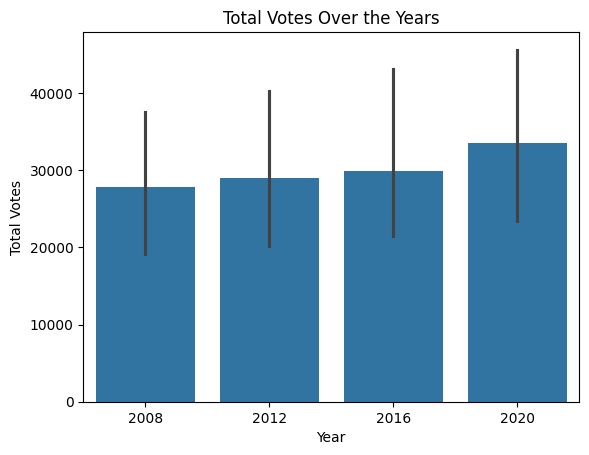

In [35]:
#New EDA
#Total Votes over the year
sns.barplot(x='year', y='totalvotes', data=df)
plt.title('Total Votes Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Votes')
plt.show()

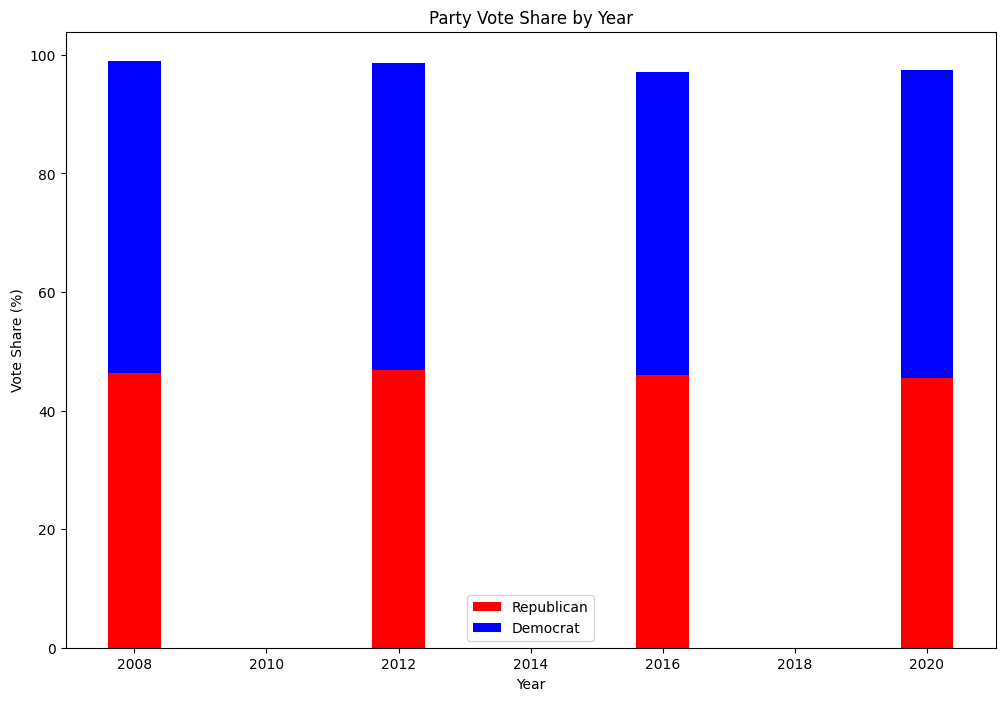

      Total Republican  Total Democrat  totalvotes  Republican Share  \
year                                                                   
2008           1725005         1959532     3723260         46.330501   
2012           1820995         1970595     3851684         46.812227   
2016           1769443         1981473     3984631         45.983031   
2020           1962430         2413568     4462600         45.423752   

      Democrat Share  
year                  
2008       52.629470  
2012       51.883248  
2016       51.140288  
2020       51.960286  


In [37]:
#Party Vote Share by Year (Republican vs. Democrat)
grouped_df = df.groupby('year').sum()

# Calculate cumulative party vote shares as percentages
grouped_df['Republican Share'] = (grouped_df['Total Republican'].cumsum() / grouped_df['totalvotes'].cumsum()) * 100
grouped_df['Democrat Share'] = (grouped_df['Total Democrat'].cumsum() / grouped_df['totalvotes'].cumsum()) * 100

# Create stacked bar plot
plt.figure(figsize=(12, 8))
plt.bar(grouped_df.index, grouped_df['Republican Share'], label='Republican', color='red')
plt.bar(grouped_df.index, grouped_df['Democrat Share'], bottom=grouped_df['Republican Share'], label='Democrat', color='blue')
plt.xlabel('Year')
plt.ylabel('Vote Share (%)')
plt.title('Party Vote Share by Year')
plt.legend()
plt.show()

print(grouped_df[['Total Republican', 'Total Democrat', 'totalvotes', 'Republican Share', 'Democrat Share']])

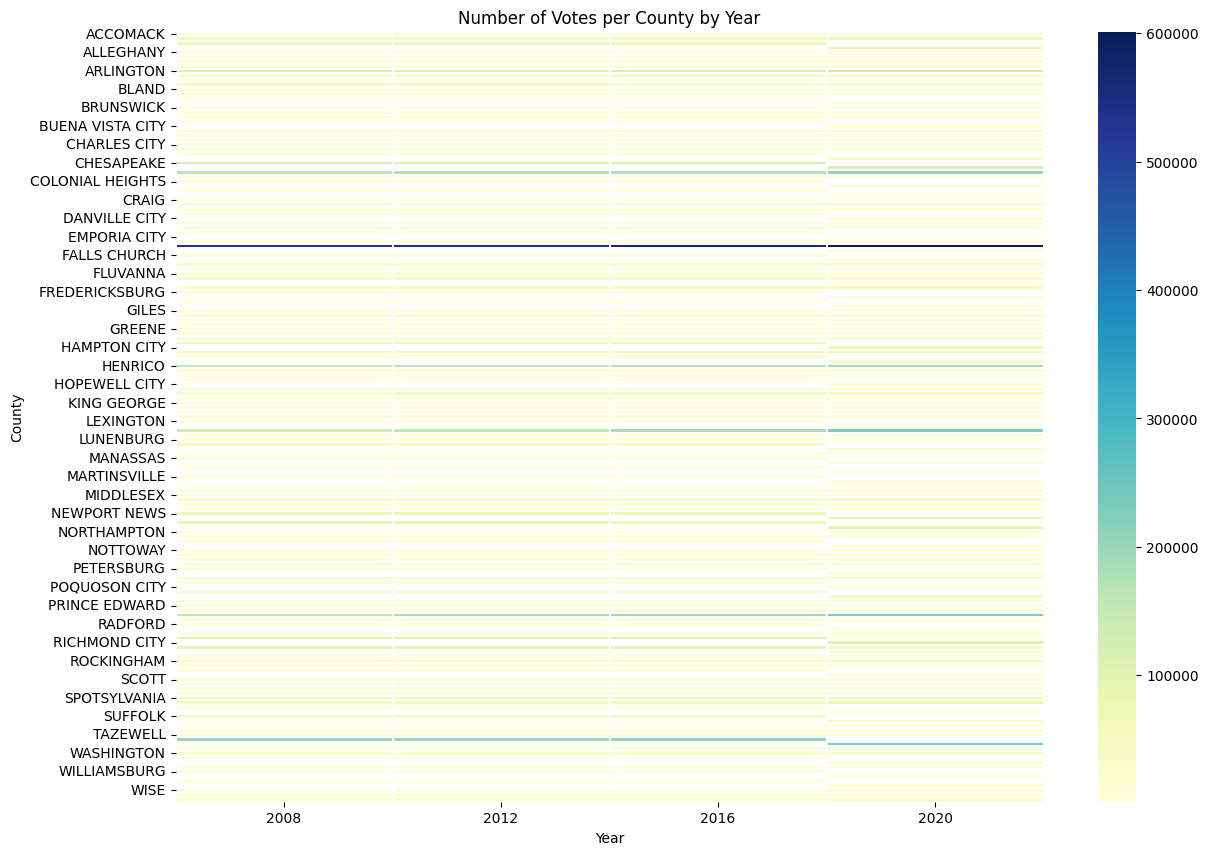

In [39]:
#Count-Wide Votes by year
#Calculate total votes per county and year
county_yr_votes = df.groupby(['year', 'county_name'])['totalvotes'].sum().reset_index()

#Years as columns
county_year = county_yr_votes.pivot(index='county_name', columns='year', values='totalvotes')

#Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(county_year, cmap='YlGnBu', linecolor='white', linewidth=0.1)
plt.title('Number of Votes per County by Year')
plt.xlabel('Year')
plt.ylabel('County')
plt.show()

## Logistic Regression

Accuracy:  0.971830985915493


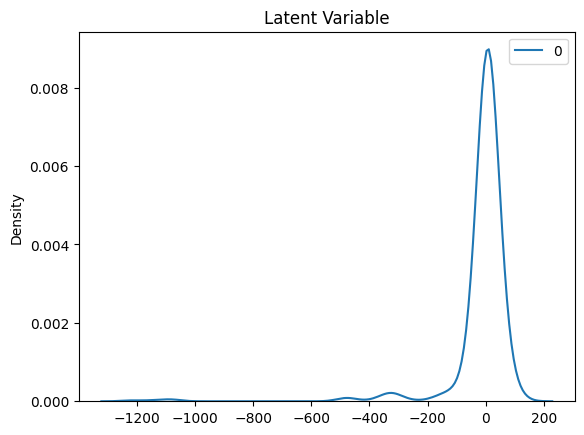

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


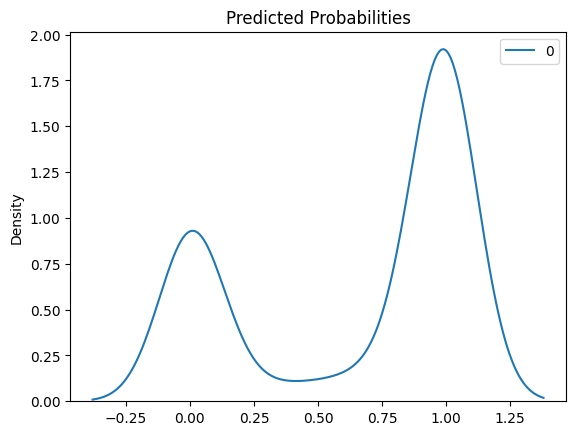

Number of 1's: 71
Number of 0's: 36


In [83]:
from sklearn.preprocessing import StandardScaler
#Negative (0) - Democratic
#Positive (1) - Republican

#Transform Response Variable (Net Vote)
df['Net Vote'] = np.arcsinh(df['Net Vote'])
#Create Column of 1's and 0's
df['Net Vote Logistic'] = np.where(df['Net Vote'] >= 0, 1, 0)

y = df['Net Vote Logistic']
X = df.iloc[:, 10:72]
## Split Training and Test Data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)


X_n = df.iloc[:, 10:72]
dummies = pd.DataFrame([])

#Concatenate Numerical
X = pd.concat([X_n, dummies], axis=1)
X.columns = X.columns.astype(str)

# Scale the numerical features
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X_train)

# Fit Logistic Regression with increased max_iter
reg = LogisticRegression(fit_intercept=False, max_iter=10000).fit(X_train, y_train)
print('Accuracy: ', reg.score(X_train, y_train))

#Calculate Latent Variable
latent = np.matmul(X, reg.coef_.T)
sns.kdeplot(latent).set_title('Latent Variable')
plt.show()

# Calculate probability of default
pr_hat = 1 / (1 + np.exp(-latent))
sns.kdeplot(pr_hat).set_title('Predicted Probabilities')
plt.show()

In [87]:
#Make predictions on Test Set
y_hat = reg.predict(X_test)
y_hat

num_ones = np.sum(y_hat == 1)
num_zeros = np.sum(y_hat == 0)

print("Number of 1's:", num_ones)
print("Number of 0's:", num_zeros)

e = y_test - y_hat
rsq = 1-np.sum(e**2)/np.sum((y_test - np.mean(y_train))**2)
RMSE = np.sqrt(np.mean(e**2))
print(f'R-squared: {rsq}')
print(f'RMSE: {RMSE}')

Number of 1's: 71
Number of 0's: 36
R-squared: 0.6181627540804243
RMSE: 0.29002094671369905


In [88]:
np.sum(np.sinh((y_hat)))
#Positive - Republicans Win

83.43928474870988